##IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

##LOAD THE DATASET

In [14]:
url = "https://raw.githubusercontent.com/softwareWCU/Unsupervised-Machine-Learning-Clustering-/main/wine-quality-white-and-red.csv"
df = pd.read_csv(url)

print("--- Dataset Preview ---")
print(df.head())
print(f"\nOriginal Data Shape: {df.shape}")

--- Dataset Preview ---
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.

##DATA PREPROCESSING

- check for missing values

In [15]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


- check for duplicates

In [16]:
df.duplicated().sum()

np.int64(1177)

In [17]:
df = df.drop_duplicates()

- check duplicates after removing the duplicates

In [18]:
df.duplicated().sum()

np.int64(0)

#Select Features

In [19]:
# We will use all numerical columns for clustering.
# If there is a text column like 'pass/fail' or 'type', we typically drop it for unsupervised clustering
# or encode it. For this dataset, we'll select the numerical features.
X = df.select_dtypes(include=[np.number]).values

#Scale the Data

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData Preprocessing Complete.")


Data Preprocessing Complete.


#DETERMINE OPTIMAL CLUSTERS (ELBOW METHOD)

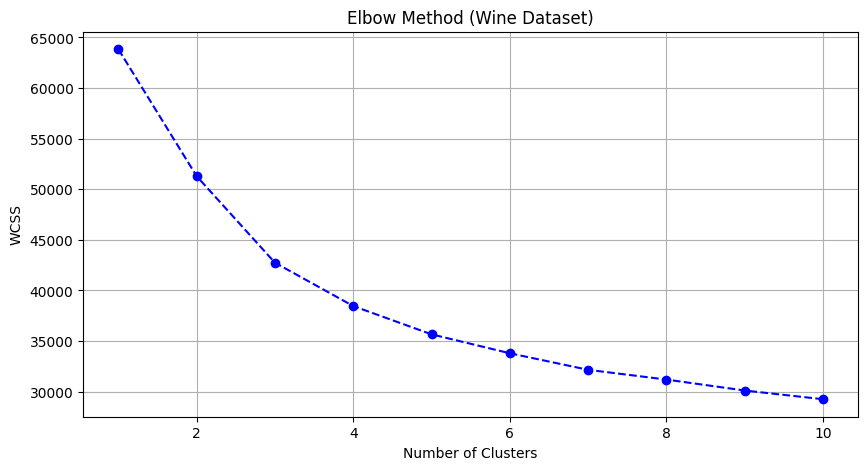


Selected Number of Clusters: 3


In [21]:
wcss = []
# We test k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method (Wine Dataset)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# NOTE: The "elbow" is the point where the curve bends.
# For this dataset, k=2 or k=3 is usually optimal.
optimal_k = 3
print(f"\nSelected Number of Clusters: {optimal_k}")

##TRAIN THE K-MEANS MODEL

In [22]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Cluster'] = clusters
print("\n--- Data with Cluster Labels ---")
print(df[['pH', 'alcohol', 'Cluster']].head()) # Showing a few relevant columns


--- Data with Cluster Labels ---
     pH  alcohol  Cluster
0  3.00      8.8        2
1  3.30      9.5        0
2  3.26     10.1        0
3  3.19      9.9        2
6  3.18      9.6        2


#VISUALIZATION (PCA)

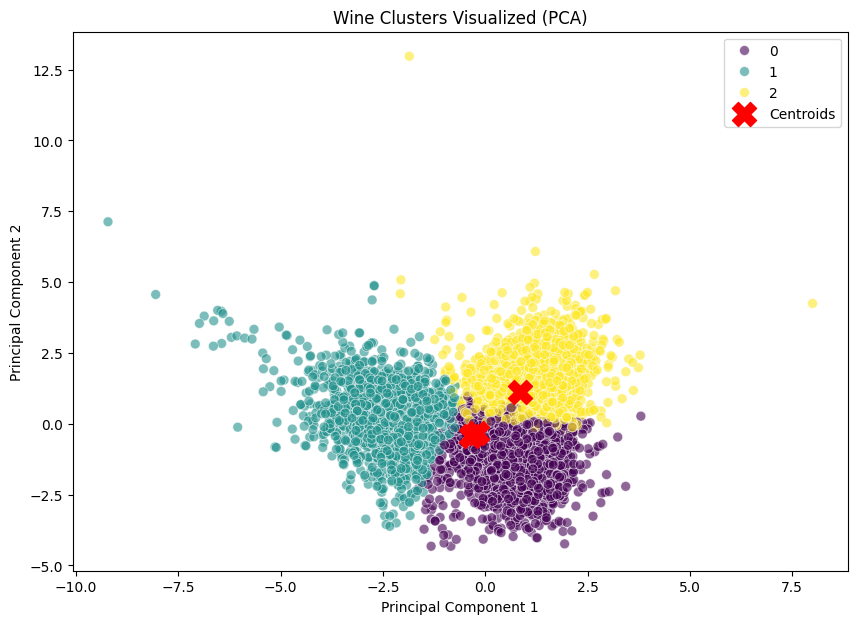

In [23]:
# Reduce 12+ dimensions down to 2 so we can see the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Wine Clusters Visualized (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

##PREDICTION

In [24]:
print("\n--- Prediction for New Wine Sample ---")
# Take a sample from the real data to simulate a new entry
sample_wine = X[0].reshape(1, -1)
sample_scaled = scaler.transform(sample_wine)

prediction = kmeans.predict(sample_scaled)
print(f"Predicted Cluster for sample: {prediction[0]}")


--- Prediction for New Wine Sample ---
Predicted Cluster for sample: 2
